In [12]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#feature scaling we apply on only numerical variables
# when we apply feature scaling ? when our dqata is converted into numerical form , i.e after our data cleaned

In [ ]:
# we take here only numerical variable columns

In [8]:
df2=df[['Survived','Pclass','Age','Parch']]
df2.head()

,Survived,Pclass,Age,Parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [ ]:
# survived is our target variable i.e survieved is dependat variable and remaining 3 feature is independant variables

In [ ]:
#our data is not cleaned , firstly we clean our data

In [9]:
df3=df2.fillna(df2.mean())     #our data is cleaned, all features in numeric format

In [ ]:
#then we need to convert our dataset to matrix and vector format, 
# independat variables in matrix format and dependat variables in vector format

In [10]:
#X for matrix and y for vector
X = df3.drop("Survived",axis=1)
y = df3["Survived"]

print("shappe of X: ",X.shape)      # 3 independatafeature in X and 1 dependat feature in y
print("shappe of y: ",y.shape)

shappe of X:  (891, 3)
shappe of y:  (891,)


In [ ]:
#now we have to split our dataset into train and test data set

#in ML alfo we apply ML algo on Train data and we check our accuracy on test data

In [11]:
from sklearn.model_selection import train_test_split    #train_test_split this class gives 4 data frames

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=51)

print("shappe of X_train: ",X_train.shape)
print("shappe of X_test: ",X_test.shape)
print("shappe of y_train: ",y_train.shape)
print("shappe of y_test: ",y_test.shape)

shappe of X_train:  (712, 3)
shappe of X_test:  (179, 3)
shappe of y_train:  (712,)
shappe of y_test:  (179,)


In [ ]:
# train test split requires for feature scaling

#now our data is ready for feature scaling

In [16]:
sc=StandardScaler()

In [47]:
sc.fit(X_train)      #not on test bcz takes mean and SD from train data
#sc.fit(X_test)

StandardScaler()

In [48]:
sc.mean_

array([1.16012069e-16, 1.52187875e-16, 6.23720800e-17])

In [49]:
sc.scale_       # standard deviation

array([1., 1., 1.])

In [50]:
X_train_sc =sc.transform(X_train)
X_test_sc =sc.transform(X_test)     # no need to scale dependat feature 

In [51]:
X_train_sc     

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [52]:
# we got 2D numpy array here , to convert into dataframe

In [53]:
X_train_sc = pd.DataFrame(X_train_sc,columns=["Pclass","Age","Parch"])
X_test_sc = pd.DataFrame(X_test_sc,columns=["Pclass","Age","Parch"])

In [54]:
X_train_sc.head() , X_test_sc.head()

(     Pclass       Age     Parch
 0  0.822005 -0.427513 -0.491985
 1  0.822005  1.997125 -0.491985
 2  0.822005 -1.428157 -0.491985
 3  0.822005 -0.889349 -0.491985
 4  0.822005  0.011163  2.019080,
      Pclass       Age     Parch
 0 -1.547500  0.804049 -0.491985
 1  0.822005  0.188268 -0.491985
 2  0.822005  0.034323 -0.491985
 3 -1.547500  0.011163 -0.491985
 4 -0.362747  0.342213  0.763547)

In [55]:
X_train_sc.describe().round(2)   # we get mean = 0 and SD = 1   i.e StandardScaler

,Pclass,Age,Parch
count,712.00,712.00,712.00
mean,-0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


# MinMaxScaling    By MinMaxScaler

In [56]:
mmc=MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [57]:
X_train_mmc =mmc.transform(X_train)
X_test_mmc =mmc.transform(X_test)   

In [58]:
X_train_mmc       # mmc applied on our X_train data set and X_test dataset

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [ ]:
#now to convert this into dataframe

In [59]:
X_train_mmc = pd.DataFrame(X_train_mmc,columns=["Pclass","Age","Parch"])
X_test_mmc = pd.DataFrame(X_test_mmc,columns=["Pclass","Age","Parch"])

In [60]:
X_train_mmc.describe().round(2)     # here we get min value = 0 and max value = 1  means 0 to 1

,Pclass,Age,Parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


In [ ]:
# to check our distribution changed or not ??

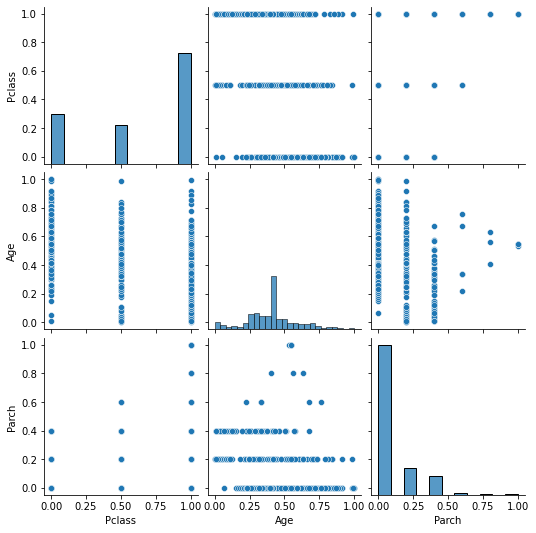

In [63]:
sns.pairplot(X_train_mmc)

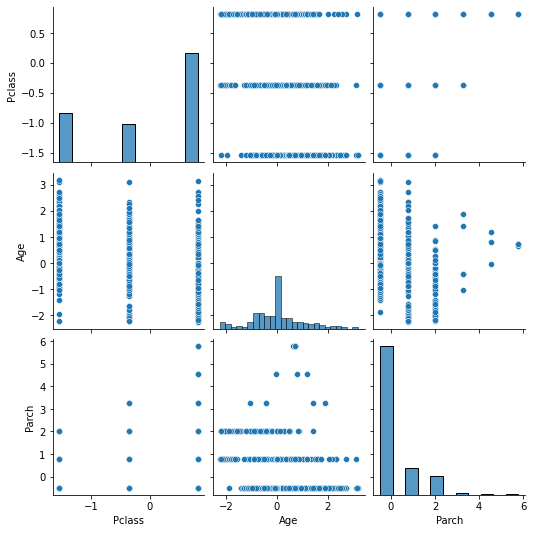

In [64]:
sns.pairplot(X_train_sc)

In [ ]:
# not major impact on dataframe